In [11]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score
from matplotlib import pyplot as plt
from tensorflow.keras import layers, losses
from keras.models import Model
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import load_model

In [2]:
(X_train,_),(X_test, _) = mnist.load_data()
X_train = X_train.astype('float32') / 255.
X_test = X_test.astype('float32') / 255.

In [3]:
X_train.shape

(60000, 28, 28)

In [4]:
def get_model():
    # Encoder
    input = layers.Input(shape=(28,28), name = 'input')
    e = layers.Flatten()(input)
    e = layers.Dense(250, activation = 'relu',name = 'Dense1')(e)
    e_output = layers.Dense(50, activation = 'relu',name = 'BottleNeck')(e)
    encoder_model = Model(inputs = [input], outputs = [e_output])
    # Decoder
    d = layers.Dense(250, activation = 'relu',name = 'Dense4')(e_output)
    d = layers.Dense(784, activation = 'sigmoid')(d) # sigmoid通常判斷是否為正常 0~1 -> 並非判斷連續趨勢 ->分類 -> 
    # 但是sigmoid使用時機:訓練、測試(未知)數據鐵定能壓到0~1之間的情況下 : ex: 圖片最高像素值也只有255，所以一定可以壓到0~1
    output = layers.Reshape((28, 28))(d)
    autoencoder_model = Model(inputs = [input], outputs = [output])
    return autoencoder_model


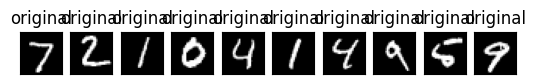

In [5]:
n = 10
for i in range(n):
  # display original
  ax = plt.subplot(2, n, i + 1)
  plt.imshow(X_test[i])
  plt.title("original")
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

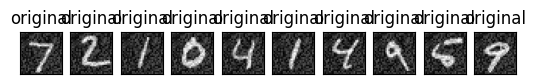

In [16]:
noise_factor = 0.5
X_train_noisy = X_train + noise_factor * np.random.rand(X_train.shape[1],X_train.shape[2])
X_test_noisy = X_test + noise_factor * np.random.rand(X_test.shape[1],X_test.shape[2])

n = 10
for i in range(n):
  # display original
  ax = plt.subplot(2, n, i + 1)
  plt.imshow(X_test_noisy[i])
  plt.title("original")
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)



In [17]:
autoencoder = get_model()
autoencoder.compile(optimizer='adam', loss='mse')
checkpoint_path = 'Autencoder_training_Denoising/autencoder.h5'
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                 save_best_only=True,
                                                 verbose=1
                                                 )
history = autoencoder.fit(X_train, X_train,
                epochs=10,
                shuffle=True,
                validation_data=(X_test, X_test),
                callbacks = [cp_callback])

Epoch 1/10
1866/1875 [============================>.] - ETA: 0s - loss: 0.0192
Epoch 1: val_loss improved from inf to 0.00910, saving model to Autencoder_training_Denoising\autencoder.h5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0191 - val_loss: 0.0091
Epoch 2/10
1864/1875 [============================>.] - ETA: 0s - loss: 0.0084
Epoch 2: val_loss improved from 0.00910 to 0.00730, saving model to Autencoder_training_Denoising\autencoder.h5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0084 - val_loss: 0.0073
Epoch 3/10
1868/1875 [============================>.] - ETA: 0s - loss: 0.0071
Epoch 3: val_loss improved from 0.00730 to 0.00646, saving model to Autencoder_training_Denoising\autencoder.h5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0071 - val_loss: 0.0065
Epoch 4/10
1865/1875 [============================>.] - ETA: 0s - loss: 0.0064
Epoch 4: val_loss improved from 0.00646 to 0.00602, saving model to Autencoder_

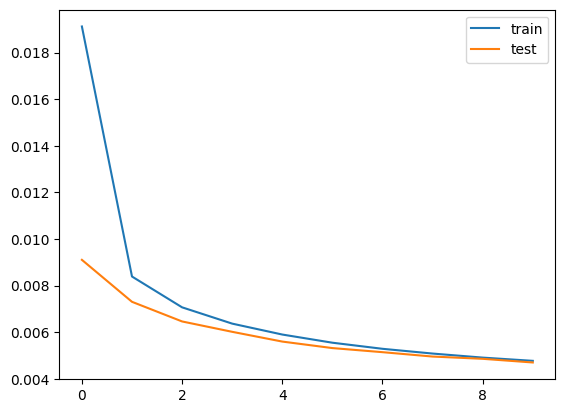

In [18]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

313/313 [==============================] - 1s 4ms/step


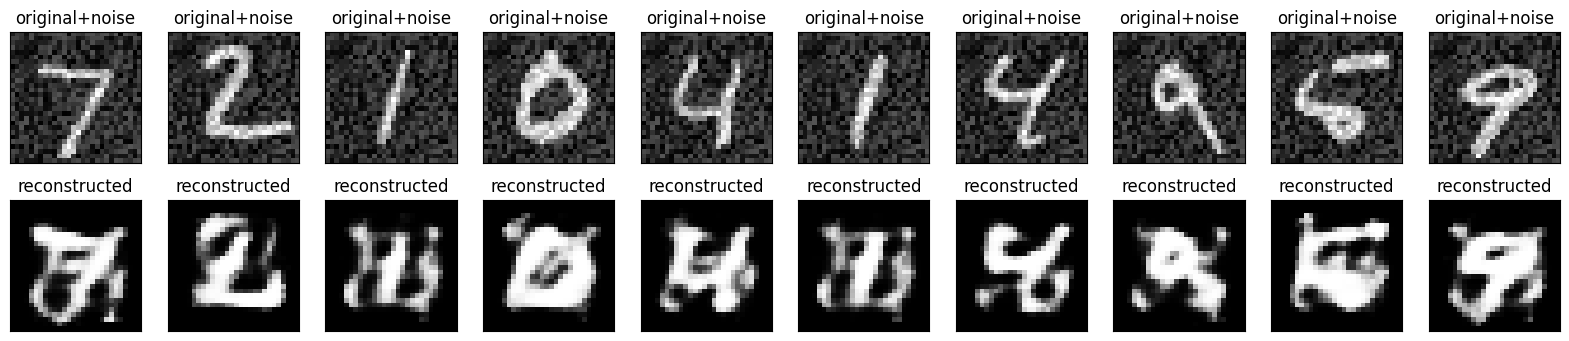

In [24]:
model_path = r'D:\DeepLearning_Knowledge\Autencoder_training_Denoising\autencoder.h5'
autoencoder = load_model(model_path)
# 4. 使用AutoEncoder 的 Encoder 以及 Decoder
decoded_imgs = np.array(autoencoder.predict(X_test_noisy))

# 5. 畫圖顯示
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
  # display original
  ax = plt.subplot(2, n, i + 1)
  plt.imshow(X_test_noisy[i])
  plt.title("original+noise")
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

  # display reconstruction
  ax = plt.subplot(2, n, i + 1 + n)
  plt.imshow(decoded_imgs[i])
  plt.title("reconstructed")
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
plt.show()